<a href="https://colab.research.google.com/github/gmldud/what_I_did_by_myself/blob/main/project2_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Merchandise Sale Prediction**
## Can we predict if a visitor, in a session, will add item(s) to the cart?


```
fullVisitorId: - 고유 방문자 ID입니다.
visitStartTime: - 타임스탬프(POSIX 시간으로 표시).
date: - 세션 날짜.
deviceCategory: - 장치 유형(모바일, 태블릿, 데스크톱).
isMobile: - 사용자가 모바일 장치를 사용하는 경우 이 값은 true이고 그렇지 않으면 false입니다.
operatingSystem: - 장치의 운영 체제(예: "Macintosh" 또는 "Windows").
browser: - 사용된 브라우저(예: "Chrome" 또는 "Firefox").
country: - IP 주소를 기반으로 세션이 시작된 국가.
city: - IP 주소 또는 지리적 ID에서 파생된 사용자의 도시
trafficSource: - 트래픽 소스의 소스입니다. 검색 엔진의 이름, 참조하는 호스트 이름 또는 utm_source URL 매개변수의 값일 수 있습니다.
trafficMedium: - 트래픽 소스의 매체입니다. "organic", "cpc", "referral" 또는 utm_medium URL 매개변수의 값일 수 있습니다.
trafficCampaign: - 캠페인 값입니다. 일반적으로 utm_campaign URL 매개변수로 설정됩니다.
isFirstVisit: 방문자의 첫 번째 방문이면 1이고, 그렇지 않으면 0입니다.
isBounce: - 방문자가 하나의 웹페이지만 방문하고 돌아오지 않으면 1이고, 그렇지 않으면 0입니다.
totalVisits: - 세션 동안 방문자의 총 방문 수입니다.
totalHits: - 세션 간의 총 상호작용 수입니다.
totalPageviews: - 세션의 총 페이지 조회수입니다.
totalTimeOnSite: - 사이트에 머문 총 시간.
totalTransactions: - 세션 간의 총 상호작용 수입니다.
productPagesViewed: - 세션에서 본 제품 페이지 수입니다.
addedToCart: - 방문자가 장바구니에 항목을 추가했거나 추가 다운스트림 작업(체크아웃, 트랜잭션)을 수행한 경우, 그렇지 않은 경우 0(방문자가 검색만 하고 항목을 장바구니에 추가하지 않은 경우). 
```

## **Data Preprocessing**

In [ ]:
#파일 불러오기
import pandas as pd 

data = pd.read_csv('/content/train___.csv');
data.head()

,fullVisitorId,visitStartTime,date,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
0,4214259466202417480,1476492957,2016-10-14 00:00:00+00:00,desktop,False,Windows,Internet Explorer,United States,not available in demo dataset,ask,organic,(not set),0.0,1.0,2.0,2.0,16.0,0.0,0.0
1,3541738396641160713,1493611205,2017-04-30 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,8276557623242379934,1490071147,2017-03-20 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Brisbane,ask,organic,(not set),0.0,1.0,2.0,2.0,16.0,0.0,0.0
3,5855313117666192014,1491048053,2017-04-01 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Sydney,ask,organic,(not set),0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,2619633492044211273,1495292376,2017-05-20 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0.0,1.0,15.0,12.0,326.0,1.0,1.0


In [ ]:
#데이터 타입과 크기 체크
#object와 bool 확인
print(f'data types \n\n{data.dtypes}')
print(f'\n\n data shape : {data.shape}')

data types 

fullVisitorId          uint64
visitStartTime          int64
date                   object
deviceCategory         object
isMobile                 bool
operatingSystem        object
browser                object
country                object
city                   object
trafficSource          object
trafficMedium          object
trafficCampaign        object
isFirstVisit          float64
totalVisits           float64
totalHits             float64
totalPageviews        float64
totalTimeOnSite       float64
productPagesViewed    float64
addedToCart           float64
dtype: object


 data shape : (6757, 19)


In [ ]:
data.T.duplicated()

fullVisitorId         False
visitStartTime        False
date                  False
deviceCategory        False
isMobile              False
operatingSystem       False
browser               False
country               False
city                  False
trafficSource         False
trafficMedium         False
trafficCampaign       False
isFirstVisit          False
totalVisits           False
totalHits             False
totalPageviews        False
totalTimeOnSite       False
productPagesViewed    False
addedToCart           False
dtype: bool

In [ ]:
#unique, freq등등 확인
pd.options.display.float_format = '{:.5f}'.format
data.describe(include = 'all')

,fullVisitorId,visitStartTime,date,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
count,6757.00000,6757.00000,6757,6757,6757,6757,6757,6757,6757,6756,6756,6756,6756.00000,6756.00000,6756.00000,6756.00000,6756.00000,6756.00000,6756.00000
unique,nan,nan,304,3,2,11,16,85,163,7,5,4,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,2017-05-16 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,dfa,cpm,(not set),nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,55,4513,4515,1983,4958,5073,3492,3631,3637,6588,nan,nan,nan,nan,nan,nan,nan
mean,4426993363450244608.00000,1484210335.34290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,6.23683,5.04618,193.54426,0.62863,0.08319
std,3076611167255481344.00000,7484925.24571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,12.36558,9.18669,494.27544,1.99575,0.27618
min,166465265517759.00000,1470037989.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,1631114716503974144.00000,1477970791.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
50%,4145225270774379520.00000,1484666877.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,2.00000,2.00000,14.00000,0.00000,0.00000
75%,7141800487136850944.00000,1490606711.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,6.00000,5.00000,146.00000,0.00000,0.00000


In [ ]:
#결측치 확인
data.isnull().sum()

fullVisitorId         0
visitStartTime        0
date                  0
deviceCategory        0
isMobile              0
operatingSystem       0
browser               0
country               0
city                  0
trafficSource         1
trafficMedium         1
trafficCampaign       1
isFirstVisit          1
totalVisits           1
totalHits             1
totalPageviews        1
totalTimeOnSite       1
productPagesViewed    1
addedToCart           1
dtype: int64

In [ ]:
#결측치 삭제, 필요없는 ID 컬럼 삭제
data = data.dropna()
data = data.drop(labels ='fullVisitorId' ,axis = 1)
data

,visitStartTime,date,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
0,1476492957,2016-10-14 00:00:00+00:00,desktop,False,Windows,Internet Explorer,United States,not available in demo dataset,ask,organic,(not set),0.00000,1.00000,2.00000,2.00000,16.00000,0.00000,0.00000
1,1493611205,2017-04-30 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
2,1490071147,2017-03-20 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Brisbane,ask,organic,(not set),0.00000,1.00000,2.00000,2.00000,16.00000,0.00000,0.00000
3,1491048053,2017-04-01 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Sydney,ask,organic,(not set),0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
4,1495292376,2017-05-20 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0.00000,1.00000,15.00000,12.00000,326.00000,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6751,1488039667,2017-02-25 00:00:00+00:00,desktop,False,Windows,Chrome,Canada,not available in demo dataset,google,organic,(not set),0.00000,1.00000,6.00000,6.00000,31.00000,0.00000,0.00000
6752,1489236627,2017-03-11 00:00:00+00:00,desktop,False,Windows,Chrome,Pakistan,not available in demo dataset,google,organic,(not set),0.00000,1.00000,6.00000,4.00000,675.00000,1.00000,0.00000
6753,1476857727,2016-10-18 00:00:00+00:00,desktop,False,Windows,Chrome,Canada,not available in demo dataset,google,organic,(not set),0.00000,1.00000,6.00000,3.00000,17.00000,1.00000,1.00000
6754,1495178524,2017-05-19 00:00:00+00:00,desktop,False,Windows,Chrome,Japan,not available in demo dataset,google,organic,(not set),0.00000,1.00000,6.00000,4.00000,61.00000,1.00000,0.00000


In [ ]:
#posix datetime 바꾸기
data['visitStartTime'] = pd.to_datetime(data['visitStartTime'], unit='ns')

In [ ]:
#visit start time 순서대로 보기 = 거의 다 같음 
#거의 다 같아서 삭제
data.sort_values(by='visitStartTime', ascending=True)
data = data.drop(labels ='visitStartTime' ,axis = 1)

In [ ]:
#2016~2017 세션날짜 기준
data.sort_values(by='date', ascending=True)

,date,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
4827,2016-08-01 00:00:00+00:00,mobile,True,Android,Chrome,United States,not available in demo dataset,google,cpc,(not set),0.00000,1.00000,3.00000,3.00000,93.00000,0.00000,0.00000
6230,2016-08-01 00:00:00+00:00,desktop,False,Macintosh,Chrome,United States,New York,google,cpc,AW - Electronics,0.00000,1.00000,17.00000,13.00000,175.00000,4.00000,0.00000
571,2016-08-01 00:00:00+00:00,desktop,False,Linux,Chrome,United States,New York,dfa,cpm,(not set),0.00000,1.00000,33.00000,31.00000,256.00000,1.00000,0.00000
5982,2016-08-01 00:00:00+00:00,desktop,False,Chrome OS,Chrome,United States,Mountain View,google,organic,(not set),0.00000,1.00000,2.00000,2.00000,12.00000,0.00000,0.00000
2577,2016-08-01 00:00:00+00:00,desktop,False,Macintosh,Chrome,United States,Mountain View,dfa,cpm,(not set),0.00000,1.00000,5.00000,5.00000,59.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,2017-05-31 00:00:00+00:00,mobile,True,iOS,Safari,United States,San Bruno,google,cpc,AW - Accessories,0.00000,1.00000,2.00000,2.00000,11.00000,0.00000,0.00000
2802,2017-05-31 00:00:00+00:00,mobile,True,iOS,Safari (in-app),United States,not available in demo dataset,dfa,cpm,(not set),0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
3604,2017-05-31 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,dfa,cpm,(not set),0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
3183,2017-05-31 00:00:00+00:00,mobile,True,Android,Android Webview,United States,not available in demo dataset,dfa,cpm,(not set),0.00000,1.00000,3.00000,3.00000,30.00000,0.00000,0.00000


In [ ]:
#addedtocart 하는 비율 5프로
data['addedToCart'].value_counts(normalize=True)

0.00000   0.91681
1.00000   0.08319
Name: addedToCart, dtype: float64

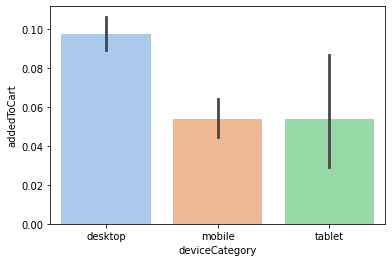

In [ ]:
#디바이스 카테고리별 addedtocart 영향
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_palette("pastel")
sns.barplot(x='deviceCategory',y='addedToCart',data=data);

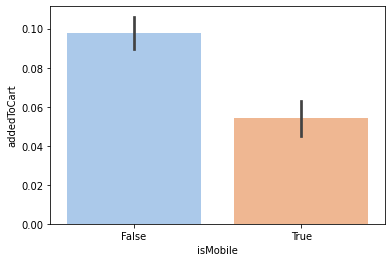

In [ ]:
#모바일이냐 아니냐에 따른 addedtocart 영향
sns.barplot(x='isMobile',y='addedToCart',data=data);

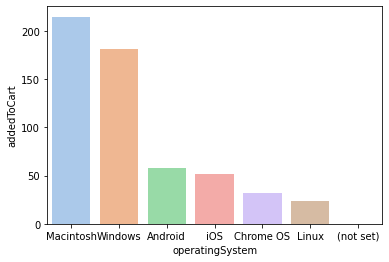

In [ ]:
#동작 시스템에 따른 addedtocart 영향
top6_system = data.groupby('operatingSystem').agg({'addedToCart':'sum'}).reset_index()
#df1 = df.groupby("Name").agg({'Value': 'min'}).reset_index()
top6_system = top6_system.sort_values(by='addedToCart',ascending = False)
top6_system = top6_system.head(7)
top6_system
sns.barplot(x='operatingSystem',y='addedToCart',data=top6_system);

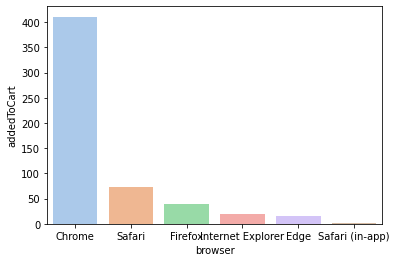

In [ ]:
#브라우져에 따른 addedtocart 영향
top6_system = data.groupby('browser').agg({'addedToCart':'sum'}).reset_index()
top6_system = top6_system.sort_values(by='addedToCart',ascending = False)
top6_system = top6_system.head(6)
top6_system
sns.barplot(x='browser',y='addedToCart',data=top6_system);

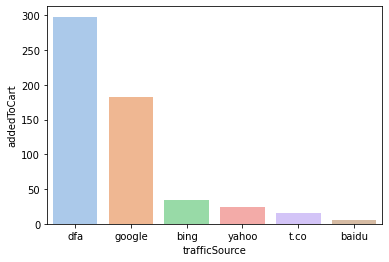

In [ ]:
#trafficsource에 따른 addedtocart 영향
top6_system = data.groupby('trafficSource').agg({'addedToCart':'sum'}).reset_index()
top6_system = top6_system.sort_values(by='addedToCart',ascending = False)
top6_system = top6_system.head(6)
top6_system
sns.barplot(x='trafficSource',y='addedToCart',data=top6_system);

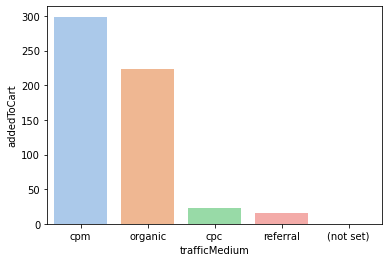

In [ ]:
#traffimedium에 따른 addedtocart 영향
top6_system = data.groupby('trafficMedium').agg({'addedToCart':'sum'}).reset_index()
top6_system = top6_system.sort_values(by='addedToCart',ascending = False)
top6_system = top6_system.head(6)
top6_system
sns.barplot(x='trafficMedium',y='addedToCart',data=top6_system);

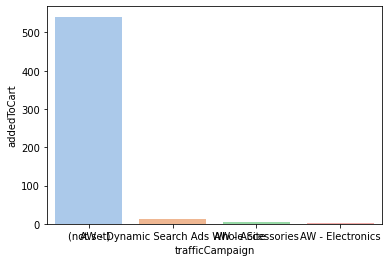

In [ ]:
#trafficCampaign에 따른 addedtocart 영향
top6_system = data.groupby('trafficCampaign').agg({'addedToCart':'sum'}).reset_index()
top6_system = top6_system.sort_values(by='addedToCart',ascending = False)
top6_system = top6_system.head(6)
top6_system
sns.barplot(x='trafficCampaign',y='addedToCart',data=top6_system);

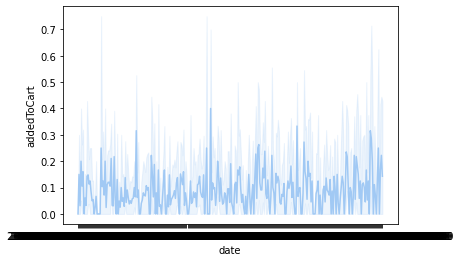

In [ ]:
#date에 따른 addedtocart 영향
sns.lineplot(x='date',y='addedToCart',data=data);

In [ ]:
#country와 city도 cardinality가 높아서 삭제
data = data.drop(labels =['date','country','city'] ,axis = 1)
data.describe(include = 'all')

,deviceCategory,isMobile,operatingSystem,browser,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
count,6756,6756,6756,6756,6756,6756,6756,6756.00000,6756.00000,6756.00000,6756.00000,6756.00000,6756.00000,6756.00000
unique,3,2,11,16,7,5,4,nan,nan,nan,nan,nan,nan,nan
top,desktop,False,Windows,Chrome,dfa,cpm,(not set),nan,nan,nan,nan,nan,nan,nan
freq,4512,4514,1982,4957,3631,3637,6588,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,6.23683,5.04618,193.54426,0.62863,0.08319
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,12.36558,9.18669,494.27544,1.99575,0.27618
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,2.00000,2.00000,14.00000,0.00000,0.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,6.00000,5.00000,146.00000,0.00000,0.00000


In [ ]:
data.deviceCategory.unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [ ]:
data.isMobile.unique()

array([False,  True])

In [ ]:
data.operatingSystem.unique()

array(['Windows', 'iOS', 'Linux', 'Android', 'Chrome OS', 'Macintosh',
       'Nintendo Wii', 'Xbox', 'Windows Phone', 'BlackBerry', '(not set)'],
      dtype=object)

In [ ]:
data.browser.unique()

array(['Internet Explorer', 'Chrome', 'Safari', 'Firefox',
       'Nintendo Browser', 'Safari (in-app)', 'Edge', 'Android Webview',
       'Amazon Silk', 'Opera', 'UC Browser', 'Android Browser',
       'BlackBerry', 'Coc Coc', 'Opera Mini', 'Maxthon'], dtype=object)

In [ ]:
data.trafficMedium.unique()

array(['organic', 'cpm', 'referral', '(not set)', 'cpc'], dtype=object)

In [ ]:
data.trafficCampaign.unique()

array(['(not set)', 'AW - Dynamic Search Ads Whole Site',
       'AW - Accessories', 'AW - Electronics'], dtype=object)

In [ ]:
data

,deviceCategory,isMobile,operatingSystem,browser,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
0,desktop,False,Windows,Internet Explorer,ask,organic,(not set),0.00000,1.00000,2.00000,2.00000,16.00000,0.00000,0.00000
1,desktop,False,Windows,Chrome,ask,organic,(not set),0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
2,desktop,False,Windows,Chrome,ask,organic,(not set),0.00000,1.00000,2.00000,2.00000,16.00000,0.00000,0.00000
3,desktop,False,Windows,Chrome,ask,organic,(not set),0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
4,desktop,False,Windows,Chrome,ask,organic,(not set),0.00000,1.00000,15.00000,12.00000,326.00000,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6751,desktop,False,Windows,Chrome,google,organic,(not set),0.00000,1.00000,6.00000,6.00000,31.00000,0.00000,0.00000
6752,desktop,False,Windows,Chrome,google,organic,(not set),0.00000,1.00000,6.00000,4.00000,675.00000,1.00000,0.00000
6753,desktop,False,Windows,Chrome,google,organic,(not set),0.00000,1.00000,6.00000,3.00000,17.00000,1.00000,1.00000
6754,desktop,False,Windows,Chrome,google,organic,(not set),0.00000,1.00000,6.00000,4.00000,61.00000,1.00000,0.00000


In [ ]:
def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""

    #mapping
    deviceCategory_dict = {"mobile":1, "tablet":2, "desktop":3}
    
    isMobile_dict = {True:1, False:0}
    
    operatingSystem_dict = {'Macintosh': 19, 'Windows': 18, 'Android': 17, 'iOS': 16, 'Chrome OS': 15, 'Linux':14,
       'Nintendo Wii':0, 'Xbox':0, 'Windows Phone':0, 'BlackBerry':0, '(not set)':0,
       'Samsung':0, 'Firefox OS':0, 'OpenBSD':0, 'Nintendo WiiU':0, 'FreeBSD':0,
       'SunOS':0, 'Nokia':0, 'Nintendo 3DS':0}
    
    browser_dict = {'Chrome':3, 'Safari':2, 'Firefox':1,'Internet Explorer':0, 
       'Nintendo Browser':0, 'Safari (in-app)':0, 'Edge':0, 'Android Webview':0,
       'Amazon Silk':0, 'Opera':0, 'UC Browser':0, 'Android Browser':0,
       'BlackBerry':0, 'Coc Coc':0, 'Opera Mini':0, 'Maxthon':0, 'YaBrowser':0,
       'Mozilla Compatible Agent':0, 'Seznam':0, 'no-ua':0, 'LYF_LS_4002_12':0,
       'Nokia Browser':0, 'Puffin':0, 'DASH_JR_3G':0, 'Mozilla':0, 'MRCHROME':0,
       'M5':0, 'TCL P500M':0, 'Iron':0, 'SeaMonkey':0, 'Lunascape':0, 'YE':0,
       'osee2unifiedRelease':0, '(not set)':0, 'ThumbSniper':0,
       'Apple-iPhone7C2':0, 'NokiaE52-1':0, 'ADM':0, 'Reddit':0,
       'subjectAgent: NoticiasBoom':0, 'Android Runtime':0, 'HTC802t_TD':0,
       'MQQBrowser':0, 'Hisense M20-M_LTE':0, 'Nichrome':0, 'Konqueror':0,
       'User Agent':0, 'LYF_LS_4002_11':0, 'CSM Click':0}
    
    trafficMedium_dict = {'(none)':7,'organic':6,'referral':5,'cpc':4,'affiliate':3,'cpm':2,'(not set)':1,}
    
    trafficCampaign_dict = {'(not set)':1, 'AW - Dynamic Search Ads Whole Site':0,
       'AW - Accessories':0, 'AW - Electronics':0, 'All Products':0,
       'AW - Apparel':0, 'Data Share Promo':0, 'Data Share':0}
    

    #applying
    df["deviceCategory"] = df.deviceCategory.map(deviceCategory_dict) 
    df["isMobile"] = df.isMobile.map(isMobile_dict)
    df["operatingSystem"] = df.operatingSystem.map(operatingSystem_dict) 
    df["browser"] = df.browser.map(browser_dict) 
    df["trafficMedium"] = df.trafficMedium.map(trafficMedium_dict)
    df["trafficCampaign"] = df.trafficCampaign.map(trafficCampaign_dict)
    
    #df["isMobile"] = list(df["isMobile"])
    #list(map(int, a))

    return df


data = engineer(data)

In [ ]:
data

,deviceCategory,isMobile,operatingSystem,browser,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
0,3,0,18,0,ask,6,1,0.00000,1.00000,2.00000,2.00000,16.00000,0.00000,0.00000
1,3,0,18,3,ask,6,1,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
2,3,0,18,3,ask,6,1,0.00000,1.00000,2.00000,2.00000,16.00000,0.00000,0.00000
3,3,0,18,3,ask,6,1,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
4,3,0,18,3,ask,6,1,0.00000,1.00000,15.00000,12.00000,326.00000,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6751,3,0,18,3,google,6,1,0.00000,1.00000,6.00000,6.00000,31.00000,0.00000,0.00000
6752,3,0,18,3,google,6,1,0.00000,1.00000,6.00000,4.00000,675.00000,1.00000,0.00000
6753,3,0,18,3,google,6,1,0.00000,1.00000,6.00000,3.00000,17.00000,1.00000,1.00000
6754,3,0,18,3,google,6,1,0.00000,1.00000,6.00000,4.00000,61.00000,1.00000,0.00000


In [ ]:
data.isnull().sum()

deviceCategory        0
isMobile              0
operatingSystem       0
browser               0
trafficSource         0
trafficMedium         0
trafficCampaign       0
isFirstVisit          0
totalVisits           0
totalHits             0
totalPageviews        0
totalTimeOnSite       0
productPagesViewed    0
addedToCart           0
dtype: int64